In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neural_net import NeuralNetwork
from operations import *
from sklearn.utils import shuffle

In [22]:
def load_dataset(csv_path, target_feature):
    dataset = pd.read_csv(csv_path)
    t = np.expand_dims(dataset[target_feature].to_numpy().astype(np.float64), axis=1)
    X = dataset.drop([target_feature], axis=1).to_numpy()
    return X, t

In [23]:
X, y = load_dataset("./data/wine_quality.csv", "quality")

# Split the data by K-fold with K=5
k_fold = 5
#np.random.seed(486)
trainXs = X
trainYs = y
trainXs, trainYs = shuffle(trainXs, trainYs)
size = X.shape[0] // k_fold
Train = []
Valid = []

for k in range(k_fold):
    X_train = np.concatenate((trainXs[0:k*size], trainXs[(k+1)*size:]))
    y_train = np.concatenate((trainYs[0:k*size], trainYs[(k+1)*size:]))
    X_valid = trainXs[k*size:(k+1)*size]
    y_valid = trainYs[k*size:(k+1)*size]

    Train.append((X_train, y_train))
    Valid.append((X_valid, y_valid))

In [24]:
print(X.shape)
print(Valid[2][0].shape)
print(Valid[2][1].shape)

(1599, 11)
(319, 11)
(319, 1)


In [25]:
losses = []
mean_absolute_errors = []
epochs = 1000

for k in range(k_fold):
    X_train = Train[k][0]
    y_train = Train[k][1]
    X_valid = Valid[k][0]
    y_valid = Valid[k][1]
    loss = []
    mse_s = []

    n_features = X_train.shape[1]
    net = NeuralNetwork(n_features, [16,32,64,32,1], [ReLU(), ReLU(), ReLU(), ReLU(), Identity()], MeanSquaredError(), learning_rate=0.001)

    # Train the network, use loss as output
    for epoch in range(epochs):
        trained_W, epoch_losses = net.train(X_train, y_train, 1)
        loss.append(epoch_losses)
         # Forward the validation set to get the output
        y_predict = net.forward_pass(X_valid)[1][-1]
        # Evaluate the network on the test set, use  mean absolute error as output
        mse_s.append(net.evaluate(X_valid, y_valid, mean_absolute_error))

    losses.append(loss)
    mean_absolute_errors.append(mse_s)

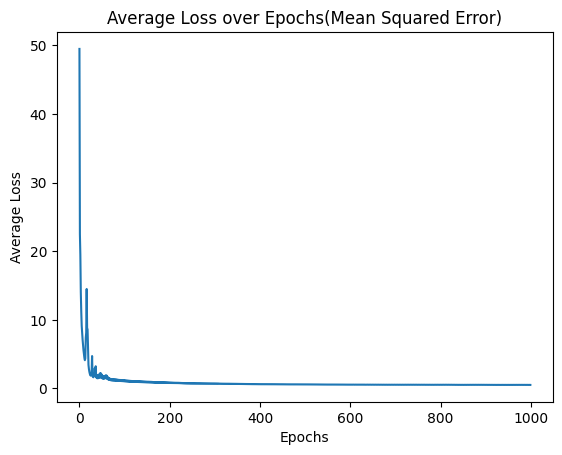

In [26]:
# Plot the average loss over epochs for all folds
avg_loss = np.mean(losses, axis=0)
plt.plot(range(epochs), avg_loss)
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Average Loss over Epochs(Mean Squared Error)")
plt.show()

In [28]:
# Calculate the average mean_absolute_errors and standard deviation of mean_absolute_errors
for i in range(k_fold):
    mean_mse = np.mean(mean_absolute_errors[i])
    std_mse = np.std(mean_absolute_errors[i])
    print("Average mean absolute error on fold {} is {}".format(i, mean_mse))
    print("Standard deviation of mean absolute error on fold {} is {}".format(i, std_mse))

Average mean absolute error on fold 0 is 0.7456629698432168
Standard deviation of mean absolute error on fold 0 is 0.3682537467061085
Average mean absolute error on fold 1 is 0.6113000038133006
Standard deviation of mean absolute error on fold 1 is 0.2634553357863461
Average mean absolute error on fold 2 is 0.7051821498927334
Standard deviation of mean absolute error on fold 2 is 0.28696174135181857
Average mean absolute error on fold 3 is 0.6992176884571599
Standard deviation of mean absolute error on fold 3 is 0.35654040027130557
Average mean absolute error on fold 4 is 0.6753454150592174
Standard deviation of mean absolute error on fold 4 is 0.3280438191096058


In [29]:
# Calculate the total average mean_absolute_errors and standard deviation of mean_absolute_errors
mean_mse = np.mean(mean_absolute_errors)
std_mse = np.std(mean_absolute_errors)
print("Average mean absolute error on all folds is {}".format(mean_mse))
print("Standard deviation of mean absolute error on all folds is {}".format(std_mse))

Average mean absolute error on all folds is 0.6873416454131257
Standard deviation of mean absolute error on all folds is 0.326155583389382


In [30]:
# Print the mean_absolute_errors for each fold(The last epoch)
for i in range(k_fold):
    print("Mean absolute error on fold {} is {}".format(i, mean_absolute_errors[i][-1]))

# Calculate the average mean_absolute_errors and standard deviation of mean_absolute_errors(The last epoch)
l = []
for i in range(k_fold):
    l.append(mean_absolute_errors[i][-1])
mean_mse = np.mean(l)
std_mse = np.std(l)
print("Mean absolute error on all folds is {}".format(mean_mse))
print("Standard deviation of mean absolute error on all folds is {}".format(std_mse))

Mean absolute error on fold 0 is 0.5651440448892995
Mean absolute error on fold 1 is 0.5383369162880031
Mean absolute error on fold 2 is 0.5768974526767434
Mean absolute error on fold 3 is 0.5475342847880513
Mean absolute error on fold 4 is 0.5456723906643546
Mean absolute error on all folds is 0.5547170178612904
Standard deviation of mean absolute error on all folds is 0.014159090679344883
